# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | Converts each non-numerical category into a separate binary column |
| **Feature selection*** | Selecting the most relevant variables for a predictive model |
| **Classifier** | A model that assigns inputs to categories instead of predicting numeric values |
| **Precision** | (true positives)/(true positives + false positives) |
| **Recall** | (true positives)/(true positives + false negatives) |
| **F1 Score** | F1=2(precision x recall)/(precision + recall) |
| **Parsimonious model** | Simple explanations are better than complicated ones |
| **Ridge regression** | An "elastic net" regression which determines predictive value of variables but keeps all variables in the model (shrinks regression coefficients towards zero, but not exactly to zero) |
| **LASSO regression** | Performs multiple regressions to find predictor variables and shrinks regression coefficients that are not important to zero |
| **Cross validation** | Compares two models using many of the same data points in each model |
| **Tree based methods** | Given several questions abobut independent variables and a dependent variable, decision trees split the data set into smaller pieces to make the problem easier to solve. |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?

A perfect classifier looks like a rectangle and a bad classifier looks like the line y=x. 

#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

When the F1 score is close to 1, it means that the model's precision and recall are fairly balanced, so it is likely an effective model. When the F1 score is close to 0, it means that the model either has low precision or recall, so it is likely not a very effective model. 

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Linear | Nonlinear |
| **Dependent Variable Type** | Numerical | Categorical |
| **Purpose** (regression or classification) | Regression | Classification |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$ | $p_i$ |
| **Method*** | Ordinary least squares | Maximum likelihood estimation |
| **Example of use** | Understanding correlations in data, predicting continuous numerical variables | Predicting categorical outcomes |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train then test our model because if we do not test the model then it does not necessarily predict future values or outcomes, it just memorizes the existing data. Therefore, training and testing models increases their utility and generalizability. 

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
housing<- read_csv("housing.csv")
summary(housing)

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [4]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_scaled <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
train <- runif(nrow(housing_scaled)) < 0.75
test <- !train

#### c) Fit the model.

In [5]:
f = median_house_value ~ longitude + latitude + housing_median_age +
  total_rooms + population + households + median_income

m <- lm(f, data=housing_scaled %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

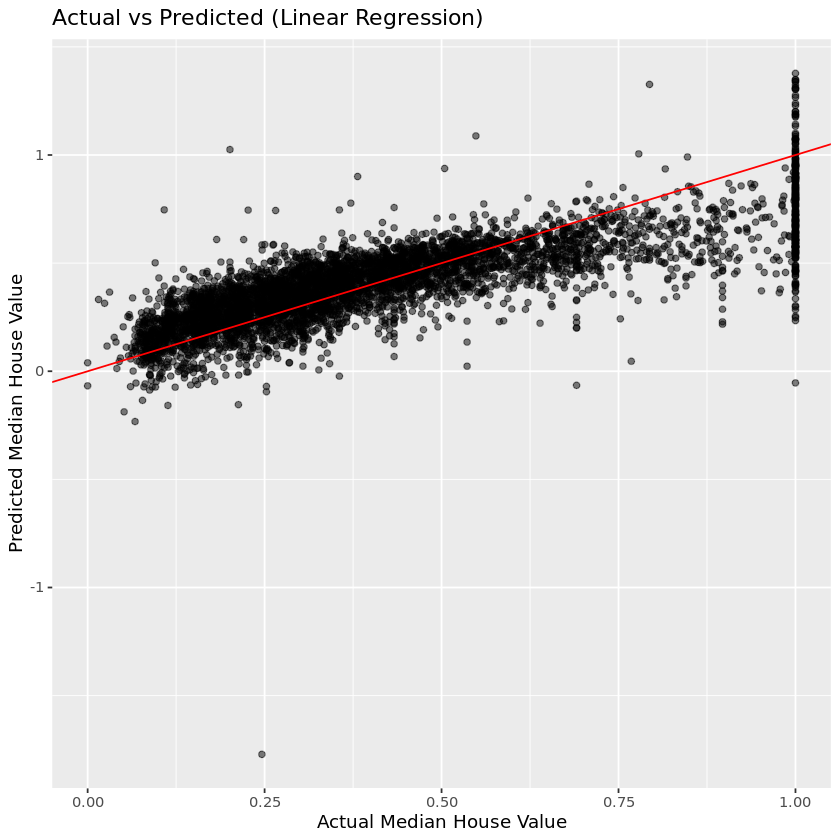

In [4]:
hs <- housing_scaled[test, ]

hs <- hs %>%
  mutate(median_house_value_pred = predict(m, newdata = hs))

ggplot(hs, aes(x = median_house_value, y = median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Actual vs Predicted (Linear Regression)",
       x = "Actual Median House Value",
       y = "Predicted Median House Value")

#### e) Make a residuals plot.

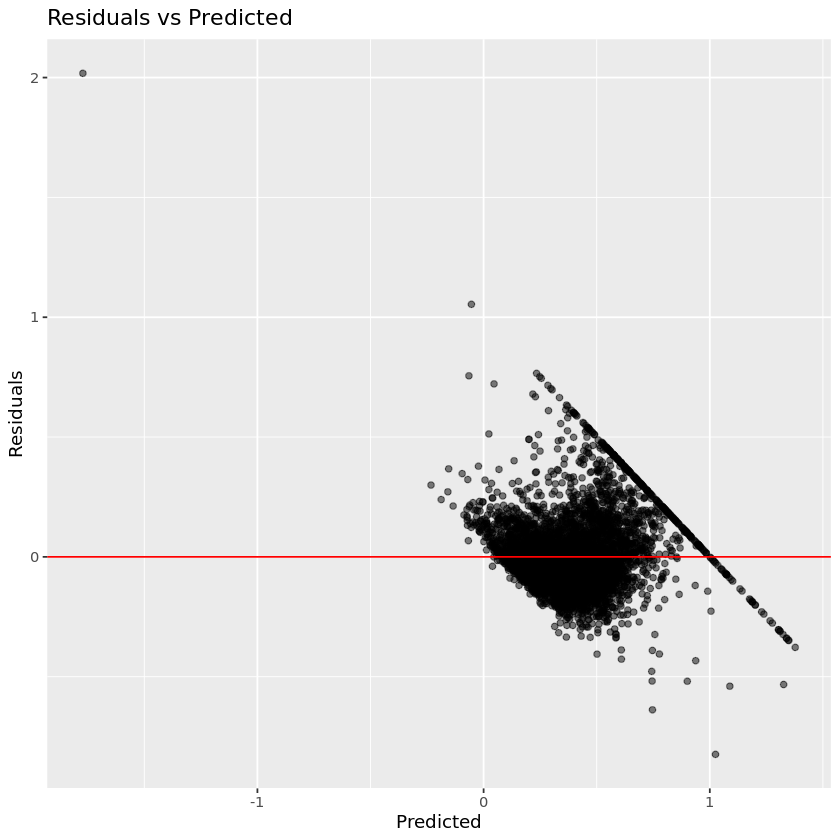

In [5]:
ggplot(hs, aes(x = median_house_value_pred, y = median_house_value - median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Residuals vs Predicted", x = "Predicted", y = "Residuals")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
The outcome variable is binary, so logistic regression is appropriate. 

In [9]:
install.packages("caret", dependencies = TRUE)

also installing the dependencies 'listenv', 'parallelly', 'rbibutils', 'future', 'globals', 'otel', 'R.methodsS3', 'R.oo', 'R.utils', 'bitops', 'Rdpack', 'shape', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'httpuv', 'xtable', 'sourcetools', 'later', 'promises', 'commonmark', 'R.cache', 'caTools', 'TH.data', 'profileModel', 'minqa', 'nloptr', 'reformulas', 'RcppEigen', 'lazyeval', 'plotrix', 'diagram', 'lava', 'shiny', 'miniUI', 'styler', 'classInt', 'labelled', 'gplots', 'libcoin', 'matrixStats', 'multcomp', 'pkgbuild', 'rprojroot', 'diffobj', 'iterators', 'clock', 'gower', 'hardhat', 'sparsevctrs', 'timeDate', 'brglm', 'gtools', 'lme4', 'qvcalc', 'rex', 'Formula', 'plotmo', 'prodlim', 'combinat', 'questionr', 'ROCR', 'mvtnorm', 'modeltools', 'strucchange', 'coin', 'zoo', 'sandwich', 'brio', 'desc', 'pkgload', 'praise', 'waldo', 'ROSE', 'e1071', 'foreach', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2', 'BradleyTerry2', 'covr', 'Cubist', 'earth', 'ellipse', 'fastICA', '


  There are binary versions available but the source versions are later:
         binary source needs_compilation
promises  1.3.3  1.4.0              TRUE
labelled 2.15.0 2.16.0             FALSE

  Binaries will be installed
package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'rbibutils' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'otel' successfully unpacked and MD5 sums checked
package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'R.oo' successfully unpacked and MD5 sums checked
package 'R.utils' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'Rdpack' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacke

installing the source package 'labelled'




In [11]:
install.packages("glmnet", dependencies = TRUE)

also installing the dependency 'lars'




package 'lars' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ella Sharpe\AppData\Local\Temp\Rtmps3x0Zh\downloaded_packages


In [12]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(glmnet))

# Load data
diabetes <- read_csv("diabetes.csv", show_col_types = FALSE)

# Summary 
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [13]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

diabetes_scaled <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
n <- nrow(diabetes_scaled)
train_idx <- sample.int(n, size = floor(0.1 * n))
d_train <- diabetes_scaled %>% slice(train_idx)
d_test  <- diabetes_scaled %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test  %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [14]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher Sc

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [15]:
p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?
The most important variables are pregnancies, glucose, and BMI. The accuracy increases with the LASSO model.

[1] 0.05480833

9 x 1 sparse Matrix of class "dgCMatrix"
                         lambda.min
(Intercept)               -4.653919
Pregnancies                1.073443
Glucose                    3.455152
BloodPressure              .       
SkinThickness              .       
Insulin                    .       
BMI                        3.507260
DiabetesPedigreeFunction   .       
Age                        .       

measure,value
<chr>,<dbl>
True Positive,120.0000000
False Positive,31.0000000
True Negative,420.0000000
False Negative,121.0000000
Accuracy,0.7803468


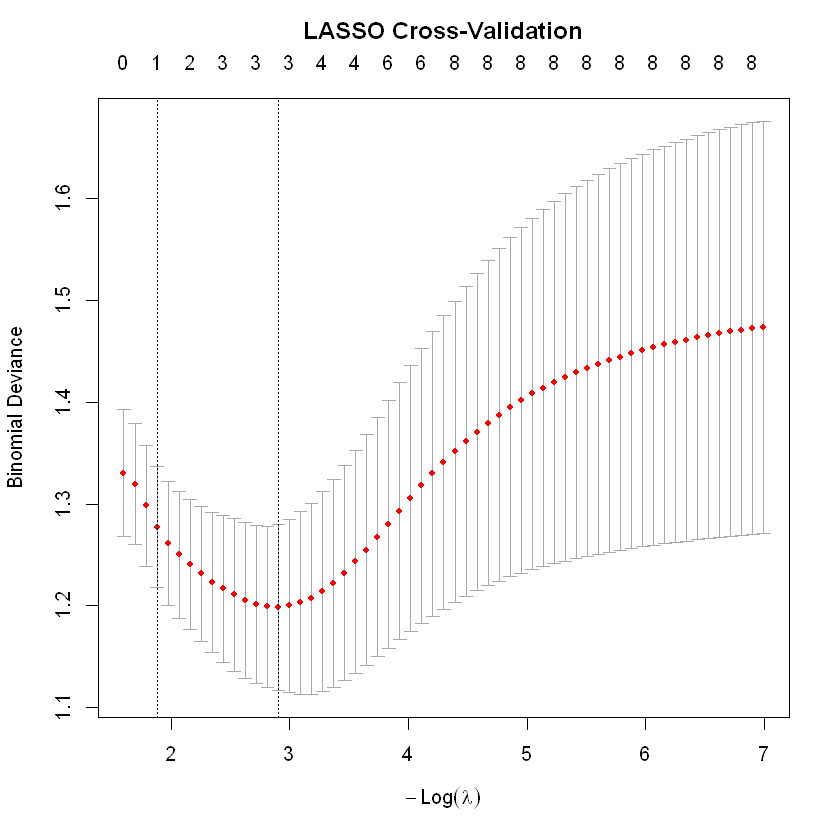

In [16]:
# Convert data frames to matrices for glmnet
X_train <- model.matrix(Outcome ~ ., d_train)[, -1]  # remove intercept
y_train <- d_train$Outcome
X_test  <- model.matrix(Outcome ~ ., d_test)[, -1]
y_test  <- d_test$Outcome

# Fit LASSO logistic regression (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(X_train, y_train, alpha = 1, family = "binomial")

# Plot cross-validation curve
plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

# Best lambda value
cv_lasso$lambda.min

# Coefficients at best lambda
coef(cv_lasso, s = "lambda.min")

# Predict on test data
lasso_pred_prob <- predict(cv_lasso, newx = X_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

# Performance metrics
tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


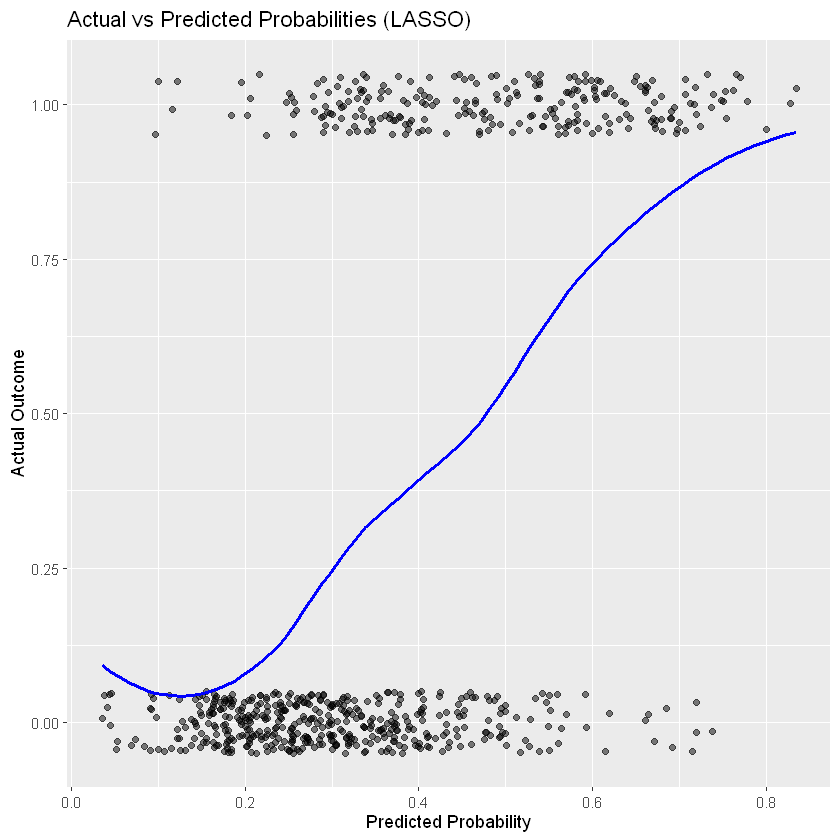

In [17]:
ggplot(data.frame(y_test, lasso_pred_prob),
       aes(x = lasso_pred_prob, y = y_test)) +
  geom_jitter(height = 0.05, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Actual vs Predicted Probabilities (LASSO)",
       x = "Predicted Probability", y = "Actual Outcome")